# Исследование объявлений о продаже квартир

Получен архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. 

**Задача** — установить параметры стоимости недвижимости. По ним будет построена автоматизированная система отслеживания аномалий и мошеннической деятельности. 

Важно учесть, что по каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Загрузка данных и изучение общей информации датасета. 

In [50]:
# импорт min библиотек
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_columns = 50

In [2]:
# грузим датасет и настраиваем отображение
data1 = 'C://Users//Demitrose//1.datasets_and_projects//Practicum Projects//1. Исследовательский анализ объявлений по продаже квартир//retail_dataset.csv'

try:
    data = pd.read_csv('C://Users//Demitrose//1.datasets_and_projects//Datasets//real_estate_data.csv', sep='\t')
    
except:
    if os.path.exists(data1):
        data = pd.read_csv(data1, sep='\t')

In [3]:
# оцениваем первые строки датасета
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
# получаем общую информацию о датасете: столбцы, ненулевые значения, кол.строк, тип данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
# оцениваем характерное(числовое) описание данных в таблице
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [6]:
# проверяем наличие явных дупликатов
print(data.duplicated().sum())

0


In [7]:
# оцениваем количество пропусков
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


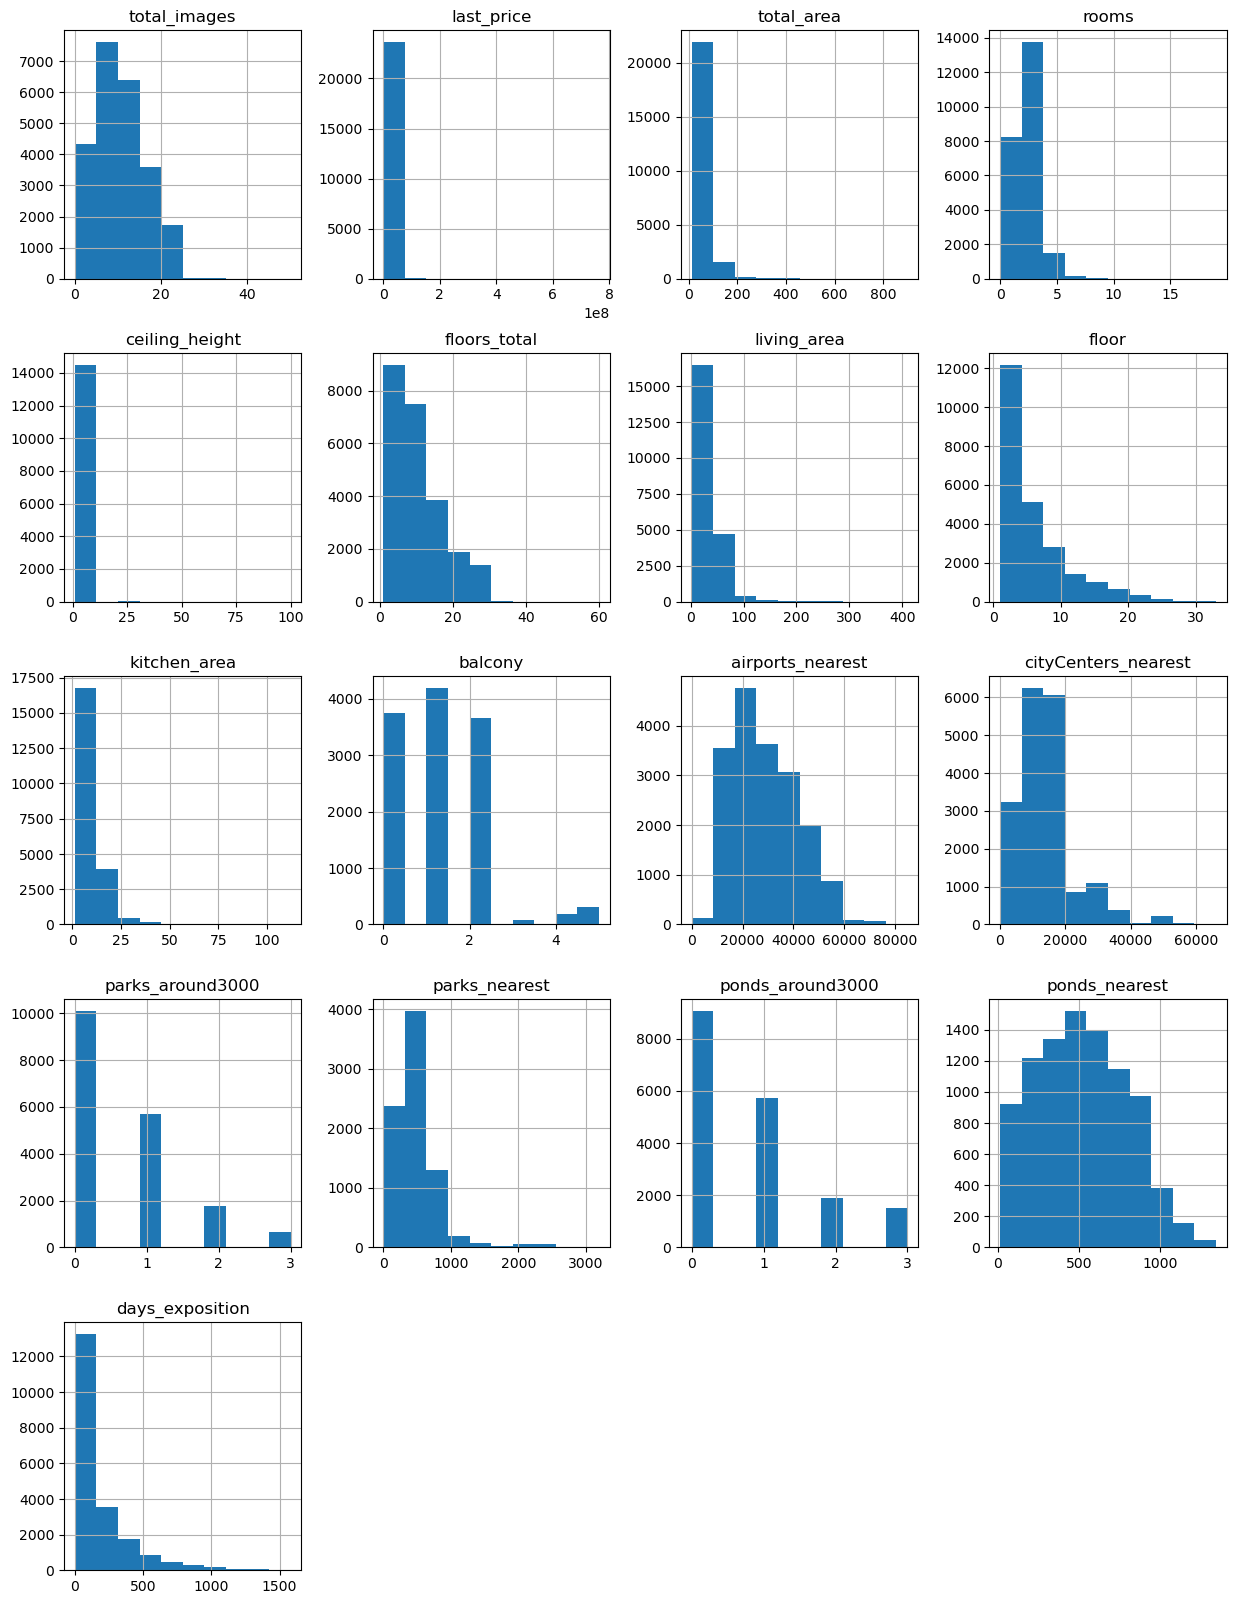

In [8]:
# строим первые гистограммы всего датасета по числовым значениям
data.hist(figsize=(15,20));

**Общие выводы на основе полученных данных:**
- Размер датасета 23.669 строк.
- Пропусков нет в столбцах: total_images, last_price, total_area, rooms, floor, studio, open_plan, living_area. 
- Есть столбцы (floors_total и locality_name), которые имеют небольшой процент пропущенных значений, данные строки с пропусками можно будет удалить, т.к. их доля небольшая и не повлияет на результат исследования.
- В столбце balcony большое количество пропусков 11.519. Можно предположить, что в данных квартирах нет балконов и пропуски можно заменить на 0.
- В названиях столбцов parks_around3000, ponds_around3000, cityCenters_nearest выявлены недочеты - не приведены к snake_case.
- Явных дупликатов нет.

**Для комфорта анализа ниже будут описание названий столбцов:**
+ airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
+ balcony — число балконов
+ ceiling_height — высота потолков (м)
+ cityCenters_nearest — расстояние до центра города (м)
+ days_exposition — сколько дней было размещено объявление (от публикации до снятия)
+ first_day_exposition — дата публикации
+ floor — этаж
+ floors_total — всего этажей в доме
+ is_apartment — апартаменты (булев тип)
+ kitchen_area — площадь кухни в квадратных метрах (м²)
+ last_price — цена на момент снятия с публикации
+ living_area — жилая площадь в квадратных метрах (м²)
+ locality_name — название населённого пункта
+ open_plan — свободная планировка (булев тип)
+ parks_around3000 — число парков в радиусе 3 км
+ parks_nearest — расстояние до ближайшего парка (м)
+ ponds_around3000 — число водоёмов в радиусе 3 км
+ ponds_nearest — расстояние до ближайшего водоёма (м)
+ rooms — число комнат
+ studio — квартира-студия (булев тип)
+ total_area — общая площадь квартиры в квадратных метрах (м²)
+ total_images — число фотографий квартиры в объявлении

### Предобработка данных

In [9]:
# переименование столбцов
data = data.rename(
    columns={'parks_around3000':'parks_around_3000', 
             'ponds_around3000':'ponds_around_3000', 
             'cityCenters_nearest':'city_centers_nearest'}
)
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [10]:
# ОБРАБОТКА ПРОПУСКОВ. Ч.1 УДАЛЕНИЕ СТРОК И ЗАМЕНА ПРОПУСКОВ НА 0

# меняем пропуски в количестве балконов на 0. Тип int т.к. дробное количество балконов быть не может и 
# речь идет о количестве балконов, а не только о том, есть ли они там, или их нет
data['balcony'] = data['balcony'].fillna(0).astype(int)

# меняем пропуски в количестве парков и водоёмов рядом (если значение пропущено, то оно не указано в объявлении, 
# если не указано, то логично предположить, что парков и водоемов поблизости нет, поэтому ставим 0). Тип int т.к. 
# дробное количество парков быть не может и речь идет о количестве пакров, а не только о том, есть ли они там, или их нет
data['parks_around_3000'] = data['parks_around_3000'].fillna(0).astype(int)
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0).astype(int)

# меняем пропуски в столбце с обозначением аппартаментов и меняем тип на булевый, т.к. квартира либо является аппартаментом, 
# либо нет
data['is_apartment'] = data['is_apartment'].fillna(value=False).astype(bool)

# удаляем строки с пропусками с количеством этажей в домах(малое количество значений и этажность дома не узнать)
data.dropna(subset=['floors_total'], inplace=True)

# удаляем пропуски с местоположением(нет возможности выяснить, где находится квартира)
data.dropna(subset=['locality_name'], inplace=True)

# проверяем количество пропусков и типы данных
print(data.isna().sum())
display(data.info())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around_3000           0
parks_nearest           15535
ponds_around_3000           0
ponds_nearest           14529
days_exposition          3171
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_are

None

In [11]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,14481.000000,23565.000000,21700.000000,23565.000000,21343.000000,23565.000000,18041.000000,18064.000000,23565.000000,8030.000000,23565.000000,9036.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.771283,10.675875,34.454822,5.878124,10.560994,0.593677,28797.082701,14192.656056,0.468831,490.580448,0.589900,518.289509,180.741395
std,5.681156,1.091093e+07,35.657060,1.078591,1.261983,6.594823,22.045359,4.871485,5.900630,0.960660,12632.499735,8613.348153,0.748403,341.572956,0.883966,278.009558,219.732782
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.510000,5.000000,18.600000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26757.000000,13096.500000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [12]:
# ОБРАБОТКА ПРОПУСКОВ. Ч.2 ЗАМЕНА ПРОПУСКОВ НЕНУЛЕВЫМИ ЗНАЧЕНИЯМИ

# заменим пустые значения жилой площади и площади кухни
living_ratio = data['living_area'].mean() / data['total_area'].mean()
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)

# приводим даты в datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

# заполняем пропуски медианой
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

# проверяем изменения
print(data.isna().sum())
display(data.head(5))
display(data.info())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around_3000           0
parks_nearest           15535
ponds_around_3000           0
ponds_nearest           14529
days_exposition          3171
dtype: int64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,90.816648,9,False,False,False,27.836861,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

None

In [13]:
# проверим неявные дубликаты
data['locality_name'].unique()

# приведем в единый вид названия, убрав приписки типа поселок и т.п.
postscript = ['городской посёлок ', 'городской поселок ', 'деревня ', 'поселок городского типа ', 'посёлок городского типа ','село '
         'садовое товарищество ', 'коттеджный посёлок ', 'коттеджный поселок ', 'садоводческое некоммерческое товарищество ', 
         'посёлок ', 'поселок ', 'имени ','при железнодорожной станции ', 'станции ']
for char in postscript:
    data['locality_name'] = data['locality_name'].str.replace(char, '')

data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'садовое товарищество Новая Ропша', 'Павловск',
       'Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск',
       'Сестрорецк', 'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое',
       'Заклинье', 'Торковичи', 'Первомайское', 'Красное Село',
       'Понтонный', 'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет',
       'Сланцы', 'село Путилово', 'Ивангород', 'Шлиссельбург',
       'Никольское', 'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино',
       'Романовка', 'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово',
       'Отрадное', 'село Павлово', 'Оредеж', 'село Копорье', 'Молодёжное',
       'Тихвин', 'Победа', 'Нурма', 'Синявино', 

**Выводы**

В процессе предобработки данных пропуски значений были заполнены:

- медианой по группам значений либо общей медианой по всем значениям;
- там, где логически это возможно – конкретными значениями, например, 0;
- когда заполнение невозможно, строки были удалены, например, количество этажей в доме.
- проработаны неявные дубликаты в названиях поселений

Возможными причинами пропусков можно выделить:

- какие-то поля мог заполнять клиент и по какой-то причине клиент не стал или не смог заполнить данные;
- сбор информации происходил из разных источников в единый датасет, структуры данных, формат записи, типы данных могли отличаться изначально;
- сбой при выгрузке данных;
- если поля заполнялись сотрудником компании, продающей квартиру, риэлтором или самим владельцем квартиры, то могли быть ошибки или пропуски по причине невнимательности, отвлеченности или нежелания/невозможности заполнить данные.

<AxesSubplot:>

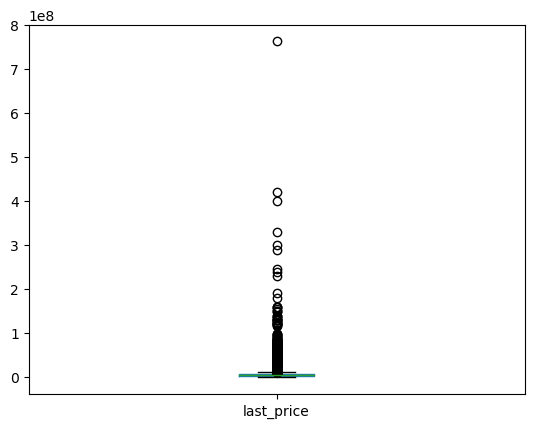

In [14]:
# построим диаграмму размаха для выявления выбросов
data.boxplot(column=['last_price'], grid= False)

In [15]:
# изучим данные
data['last_price'] = data['last_price'] / 1000000
data['last_price'].head()
data['last_price'].describe()

count    23565.000000
mean         6.540058
std         10.910935
min          0.012190
25%          3.400000
50%          4.646000
75%          6.790000
max        763.000000
Name: last_price, dtype: float64

In [16]:
# исключим значения с наименьшей ценой квартиры в 12 тысяч рублей
data['last_price'][data['last_price'] < 1].count()
data.loc[data['last_price'] < 1,'last_price'] = None
data = data.dropna(subset=['last_price'])
data['last_price'].describe()

count    23340.000000
mean         6.595700
std         10.948592
min          1.000000
25%          3.470000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64

In [17]:
# квартиры с ценой выше 100 млн. исключим, т.к. это слишком высокие выбросы
data_price = data.query('last_price < 200')
data_price['last_price'].describe()

count    23331.000000
mean         6.460293
std          7.928712
min          1.000000
25%          3.469100
50%          4.650000
75%          6.800000
max        190.870000
Name: last_price, dtype: float64

<AxesSubplot:>

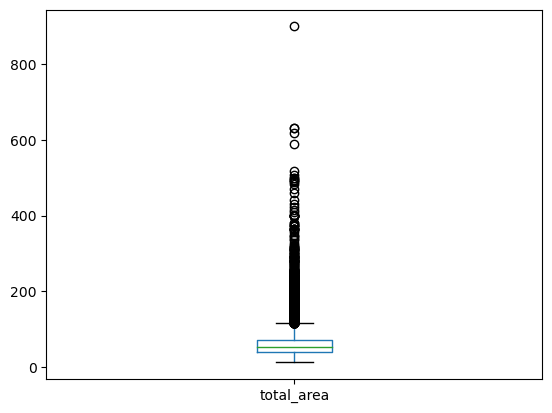

In [18]:
# построим диаграмму размаха для выявления выбросов
data.boxplot(column=['total_area'], grid= False)

In [19]:
# примерно до 400 кв.м. идет плотное количество значений, просто так их не удалить
# после 400 кв.м. начинаются просветы, а значит количество значений в этом диапазоне снижается и уже отсюда можно отрезать
data_area = data_price.query('total_area <= 400')

<AxesSubplot:>

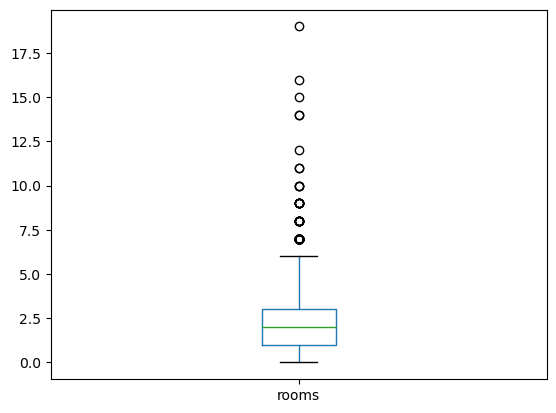

In [20]:
# построим диаграмму размаха для выявления выбросов
data.boxplot(column=['rooms'], grid=False)

In [21]:
# судя по всему количество значений выше 6 комнат невелико, поэтому можно их отбросить
data = data_area.query('rooms <= 6')

<AxesSubplot:>

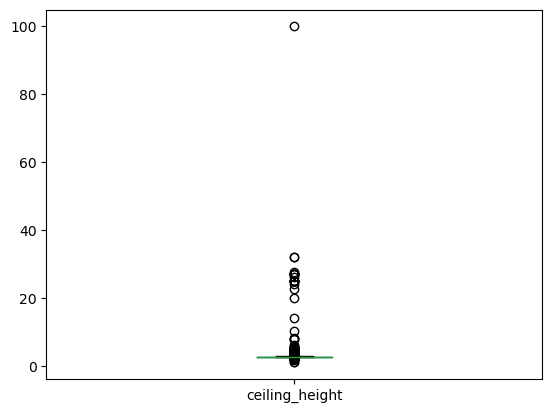

In [22]:
data.boxplot(column=['ceiling_height'], grid=False)

In [23]:
# на графике отчетливо виден выброс в районе 100 м, также в выбросы можно отнести значение чуть менее 30. Уберем эти значения.
data = data.query('ceiling_height < 35')

In [24]:
data.shape

(23233, 22)

**Дополнительный вывод**
- из датасета были удалены аномальные значения в четырех столбцах: в столбце с итоговой ценой, с общей площадью, высотой и количеством комнат. Это позволит нам иметь более чистые данные, которые дадут более точный анализ и вывод по его итогу.

### Новые расчеты и столбцы

In [25]:
# добавим цену за квадрат
data['price_area'] = data['last_price'] / data['total_area']

# добавим столбцы дня недели, месяца и года
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

# добавим тип этажа
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_group, axis=1)

# добавим расстояние до центра в км
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)

**Выводы**

В датасет были рассчитаны и добавлены столбцы со следующими значениями:
- цена одного квадратного метра
- день публикации объявления 
- месяц публикации объявления
- год публикации объявления
- тип этажа квартиры
- расстояние в км до центра города

Данная информация является актуальной для анализа информации и в дальнейшем анализе будет играть существенную роль для формирования итоговых выводов.

### Исследовательский анализ полученного датасета

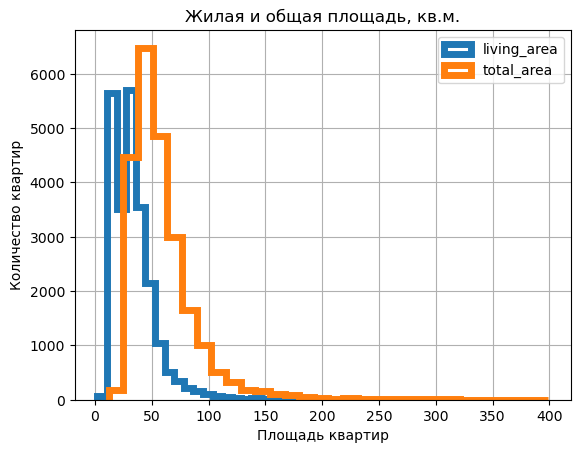

count    23233.000000
mean        34.003983
std         19.473779
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        255.700000
Name: living_area, dtype: float64
count    23233.000000
mean        59.411445
std         30.585404
min         12.000000
25%         40.000000
50%         52.000000
75%         69.500000
max        399.000000
Name: total_area, dtype: float64


In [26]:
# гистограммы по жилой и общей площади квартир датасета
living_area_hist = ( 
    data['living_area']
    
    .plot(kind='hist',
          y='total_area', 
          histtype='step', 
          bins=30, 
          grid=True, 
          legend=True, 
          alpha=1,
          linewidth=5)
)

total_area_hist = ( 
    data['total_area']
    
    .plot(kind='hist',
          y='total_area',
          histtype='step',
          bins=30, 
          grid=True, 
          legend=True, 
          alpha=1,
          title='Жилая и общая площадь, кв.м.',
          linewidth=5,
          ax=living_area_hist)
    
    .set(xlabel='Площадь квартир',
         ylabel='Количество квартир')
)
plt.show()

print(data['living_area'].describe())
print(data['total_area'].describe())


**Вывод**
- Средняя общая площадь квартир равняется порядка 60 кв.м. На продажу были выставлены квартиры от 12 до 900 кв.м. Наибольшее количество квартир находится в диапозоне 40-60 кв.м.
- Средняя жилая площадь квартир составляет порядка 34,5 кв.м. В датасете представлены квартиры с жилой площадью от 2 до 409 кв.м., что можно соотнести с минимальной и маскимальной общей площадью квартир.

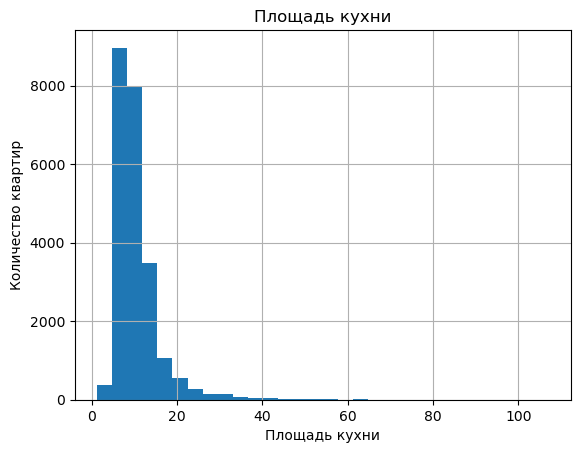

count    23233.000000
mean        10.440512
std          5.743326
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64
10.00000    1259
6.00000     1247
8.00000     1088
9.00000     1083
7.00000     1047
            ... 
11.84000       1
12.56000       1
19.64337       1
20.56000       1
13.83000       1
Name: kitchen_area, Length: 1634, dtype: int64


In [27]:
# гистограмма по площади кухни
(
data['kitchen_area']
    .hist(bins=30)
    
    .set(title='Площадь кухни',
         xlabel='Площадь кухни', 
         ylabel='Количество квартир')
)
plt.show()
print(data['kitchen_area'].describe())
print(data['kitchen_area'].value_counts())

**Вывод**
- Средняя площадь кухонь около 10,5 кв.м. Площадь кухонь варьируется от 1,3 кв.м. до 112 кв.м., что вполне сопоставляется с данными, полученными на предыдущих гистограммах. 
- Наибольшее число объявлений - это квартиры с кухнями до 6 - 10 кв.м, что также соотносится с предыдущими выводами.

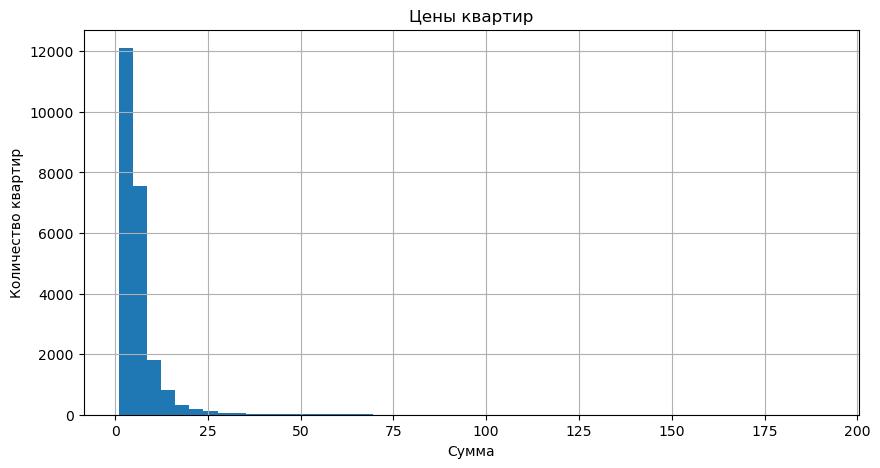

count    23233.000000
mean         6.323935
std          7.330145
min          1.000000
25%          3.450000
50%          4.650000
75%          6.750000
max        190.870000
Name: last_price, dtype: float64


In [28]:
# гистограмма по цене
(
(data['last_price'])
    .hist(bins=50, 
          figsize=(10,5))
    
    .set(title='Цены квартир',
         xlabel='Сумма', 
         ylabel='Количество квартир')
)
plt.show()
print(data['last_price'].describe())


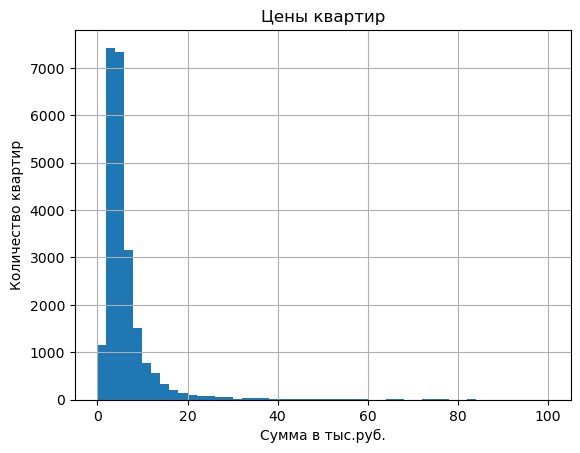

4.500000     341
3.500000     289
4.000000     260
4.300000     260
4.200000     258
            ... 
11.207364      1
11.757590      1
2.205000       1
6.849000       1
11.475000      1
Name: last_price, Length: 2837, dtype: int64


In [29]:
# приблизим значения выборкой для детального изучения
(
(data['last_price'])
    .hist(bins=50, 
          range=(0, 100))
    
    .set(title='Цены квартир',
         xlabel='Сумма в тыс.руб.', 
         ylabel='Количество квартир')
)
plt.show()
print(data['last_price'].value_counts())

**Вывод**  

- Наибольшее количество объявлений находятся в диапазоне от 3 до 5 млн.руб. с пиковым значением порядка 4,5 млн.руб. Данные суммы соотносятся с той информацией, что наибольшее число объявлений - это небольшие квартиры общей площадью 40-60 кв.м.

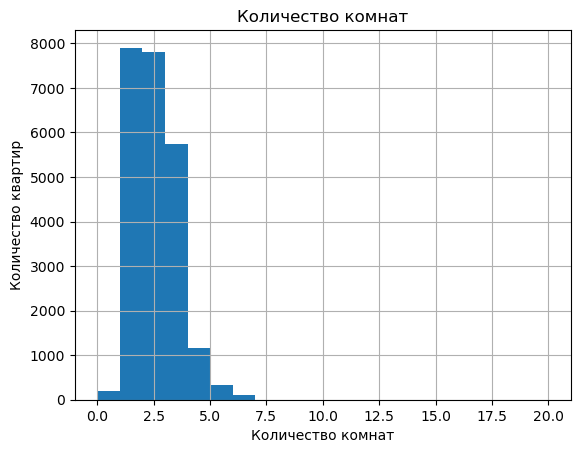

count    23233.000000
mean         2.049671
std          1.005809
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64
1    7902
2    7801
3    5750
4    1168
5     320
0     193
6      99
Name: rooms, dtype: int64


In [30]:
# гистограмма количества комнат
(
(data['rooms'])
    .hist(bins=20, 
          range=(0, 20))
    
    .set(title='Количество комнат',
         xlabel='Количество комнат', 
         ylabel='Количество квартир')
)
plt.show()
print(data['rooms'].describe())
print(data['rooms'].value_counts())

**Вывод**
- Самые популярные квартиры - это 1 и 2 комнатные квартиры. Далее расположились квартиры с 3 комнатами. На данном этапе данные показатели не выбиваются из общего ряда выводов, сделанных на предыдущих этапах - что самыми популярными квартирами являются небольшие квартиры, доступные большинству жителей страны.

count    23113.000000
mean         2.690443
std          0.195213
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.980000
Name: ceiling_height, dtype: float64
2.65    9589
2.50    3466
2.60    1634
2.70    1563
3.00    1097
        ... 
3.39       1
3.98       1
3.68       1
2.20       1
3.59       1
Name: ceiling_height, Length: 178, dtype: int64


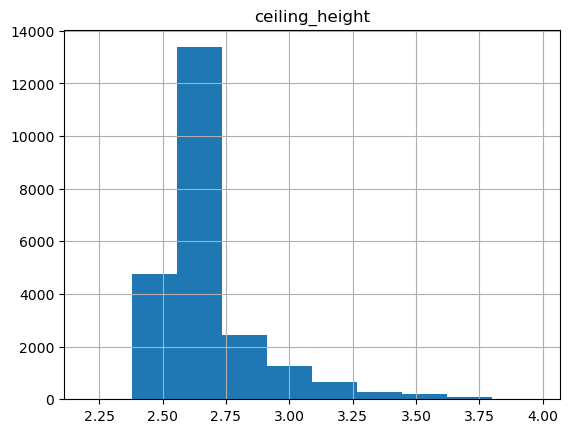

In [31]:
# гистограмма количества комнат
ceiling_height_norm = data.query('(ceiling_height < 4) & (ceiling_height > 2)')
ceiling_height_norm.hist('ceiling_height', bins=10)

print(ceiling_height_norm['ceiling_height'].describe())
print(data['ceiling_height'].value_counts())

**Вывод**
- Самые часто встречающиеся значения высот находятся в пределах от 2 до 3 метров, что также характерно для типовых квартир массовой застройки в России. Из анализа исключили значения высот до 2 метров и более 4 метров, т.к. квартиры подобных высот потолков встречаются крайне редко либо это ошибки данных.

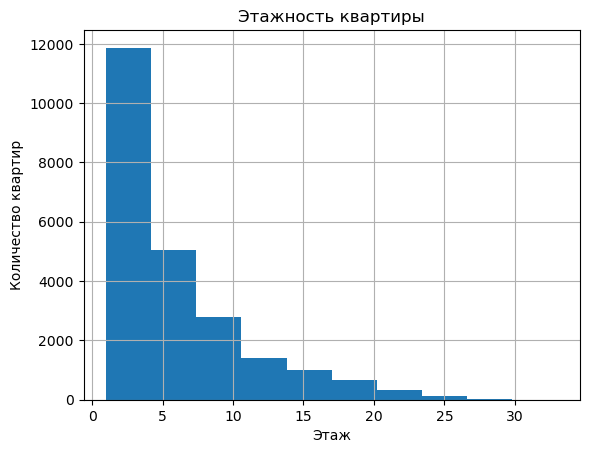

count    23233.000000
mean         5.914174
std          4.884861
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64
2     3288
3     3011
1     2822
4     2748
5     2556
6     1287
7     1198
8     1073
9     1042
10     683
12     519
11     519
13     376
15     339
14     333
16     315
17     225
18     174
19     144
21     119
22     111
20     108
23      98
24      61
25      44
26      24
27      10
28       1
30       1
29       1
32       1
33       1
31       1
Name: floor, dtype: int64


In [32]:
# гистограмма этажности квартиры
(
(data['floor'])
    .hist(bins=10)
    
    .set(title='Этажность квартиры',
         xlabel='Этаж', 
         ylabel='Количество квартир')
)
plt.show()
print(data['floor'].describe())
print(data['floor'].value_counts())

**Вывод**
- На данном этапе можно сделать вывод о том, что наибольшее число квартир находятся в пределах 1 - 5 этажа. 
- Второй группой популярных этажей являются квартиры с 6 по 9 этажи. 
- Учитывая предыдущие выводы и то, что у нас распространены 5 и 9 этажные дома, то всё выглядит логично.

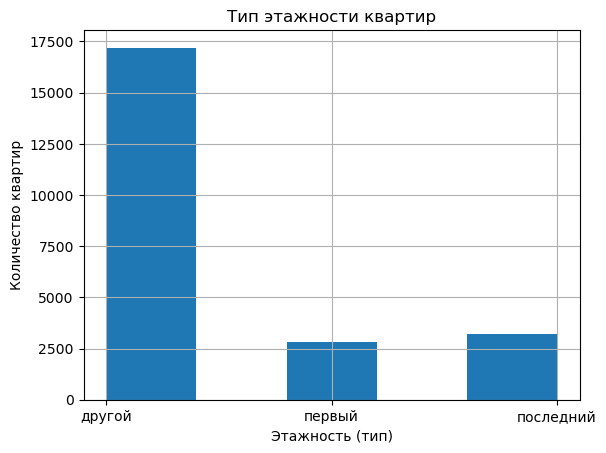

count      23233
unique         3
top       другой
freq       17193
Name: floor_type, dtype: object
другой       17193
последний     3218
первый        2822
Name: floor_type, dtype: int64


In [33]:
# гистограмма типа этажности квартиры
(
(data['floor_type'])
    .hist(bins=5)
    
    .set(title='Тип этажности квартир',
         xlabel='Этажность (тип)', 
         ylabel='Количество квартир')
)
plt.show()
print(data['floor_type'].describe())
print(data['floor_type'].value_counts())

**Вывод**
- Квартиры на первом и последнем этаже пользуются существенно меньшей популярностью и имеют наименьшую долю даже в сумме. 
- Квартиры на последнем этаже являются немного привлекательнее, чем на первом. 
- Квартиры не на первом и не на последнем этажах имеют подавляющую долю среди всех объявлений.

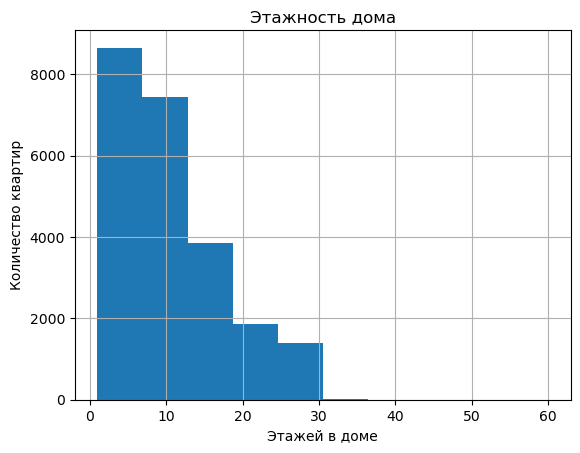

count    23233.000000
mean        10.760427
std          6.595213
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64
5.0     5625
9.0     3749
16.0    1374
12.0    1360
10.0    1173
4.0     1168
25.0    1073
6.0      885
17.0     833
3.0      637
7.0      573
14.0     553
18.0     505
24.0     462
8.0      384
15.0     365
23.0     349
19.0     339
2.0      322
22.0     286
20.0     269
13.0     228
11.0     202
27.0     164
21.0     158
26.0     124
35.0      24
28.0      21
1.0       19
36.0       3
34.0       1
60.0       1
29.0       1
33.0       1
52.0       1
37.0       1
Name: floors_total, dtype: int64


In [34]:
# гистограмма этажности дома, в котором находится квартира
(
(data['floors_total'])
    .hist(bins=10)
    
    .set(title='Этажность дома',
         xlabel='Этажей в доме', 
         ylabel='Количество квартир')
)
plt.show()
print(data['floors_total'].describe())
print(data['floors_total'].value_counts())

**Вывод**
- Здесь можно найти подтверждение предыдущему выводу, где было сказано, что в России наиболее распространены 5 и 9 этажные дома и скорее всего в датасете данная тенденция сохранялась бы. Видно, что наибольшее число объявлений - это объявления в 5 и 9 этажных домах. 

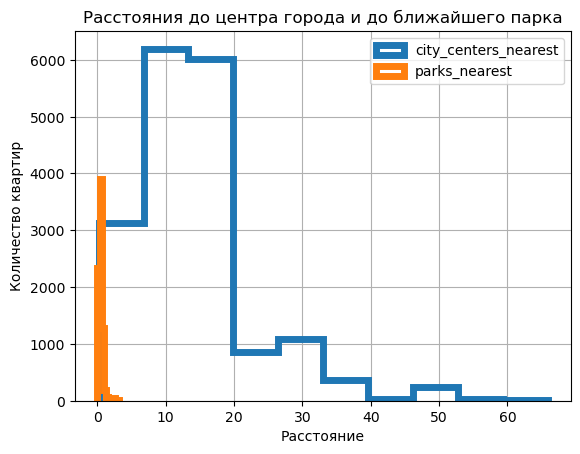

count    17958.000000
mean     14241.821250
std       8605.626388
min        181.000000
25%       9334.750000
50%      13138.000000
75%      16295.500000
max      65968.000000
Name: city_centers_nearest, dtype: float64
8460.0     61
20802.0    32
10720.0    30
8434.0     27
20444.0    27
           ..
16631.0     1
24311.0     1
15782.0     1
11940.0     1
6263.0      1
Name: city_centers_nearest, Length: 7580, dtype: int64
count    7952.000000
mean      491.031313
std       342.294521
min         1.000000
25%       288.000000
50%       455.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64
441.0     67
392.0     41
456.0     40
173.0     40
2102.0    30
          ..
858.0      1
133.0      1
828.0      1
808.0      1
2984.0     1
Name: parks_nearest, Length: 991, dtype: int64


In [35]:
# гистограмма расстояния до центра города в км
city_centers_nearest_hist = ( 
    (data['city_centers_nearest'] / 1000)
    
    .plot(kind='hist',
          y='total_area', 
          histtype='step', 
          bins=10, 
          grid=True, 
          legend=True, 
          alpha=1,
          linewidth=5)
)

# гистограмма расстояния до ближайшего парка в км
parks_nearest_hist = ( 
    (data['parks_nearest'] / 1000)
    
    .plot(kind='hist',
          y='total_area',
          histtype='step',
          bins=10, 
          grid=True, 
          legend=True, 
          alpha=1,
          title='Расстояния до центра города и до ближайшего парка',
          linewidth=5,
          ax=city_centers_nearest_hist)
    
    .set(xlabel='Расстояние',
         ylabel='Количество квартир')
)
plt.show()

print(data['city_centers_nearest'].describe())
print(data['city_centers_nearest'].value_counts())
print(data['parks_nearest'].describe())
print(data['parks_nearest'].value_counts())

**Вывод**
- более 65% квартир имеют хотя бы один парк на расстоянии до 500 метров. Этот показатель может быть существенным фактором для выбора квартиры для семейных людей и людей, предпочитающих заниматься спортом на улице. 
- большая часть квартир находится от центра города на расстоянии до 15 км., т.е. примерно 10-15 минут езды на автомобиле, что является довольно комфортным временем, чтобы доехать до центра. 

count    17936.000000
mean        28.818861
std         12.653946
min          6.450000
25%         18.539000
50%         26.794500
75%         37.313000
max         84.869000
Name: airports_nearest, dtype: float64
37.434    61
21.928    32
39.946    30
44.870    30
37.407    27
          ..
45.008     1
14.828     1
23.418     1
41.058     1
24.665     1
Name: airports_nearest, Length: 8200, dtype: int64


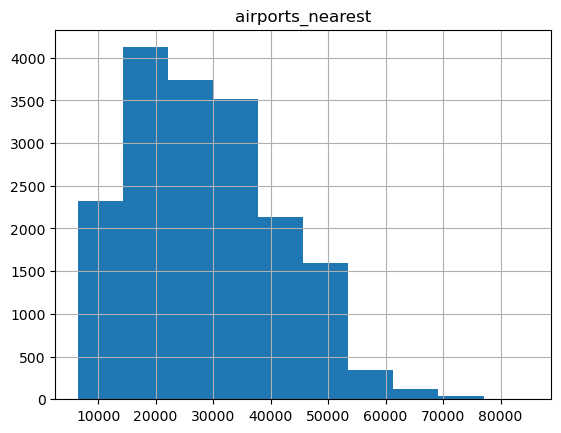

In [36]:
# гистограмма расстояния до ближайшего аэропорта в км (для этого значения делим на 1.000)

airports_nearest_norm = data.query('airports_nearest > 0')
airports_nearest_norm.hist('airports_nearest', bins=10)

print((airports_nearest_norm['airports_nearest'] / 1000).describe())
print((airports_nearest_norm['airports_nearest'] / 1000).value_counts())

**Вывод**
- Среднее расстояние до ближайшего аэропорта равно около 28 км. Пиковые значения по количеству квартир в датасете находятся на расстоянии от 22 до 30 км.. 
- Также из датасета исключены квартиры, находящиеся на расстоянии 0,000 км от аэропорта.

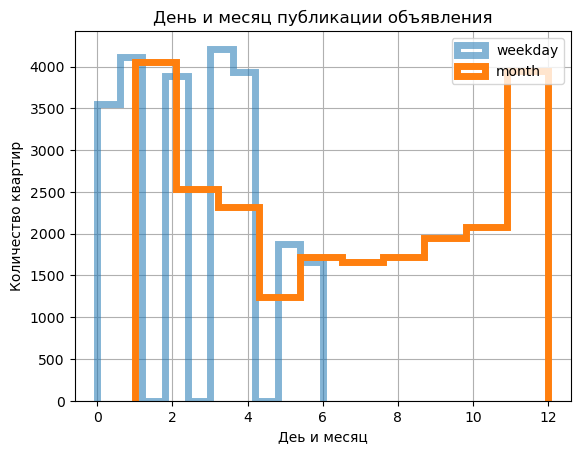

count    23233.000000
mean         2.565058
std          1.787934
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64
3    4213
1    4115
4    3937
2    3886
0    3550
5    1872
6    1660
Name: weekday, dtype: int64
count    23233.000000
mean         6.406448
std          3.493063
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64
2     2594
3     2536
11    2332
4     2323
10    2084
9     1945
8     1721
6     1720
7     1659
12    1616
1     1463
5     1240
Name: month, dtype: int64


In [37]:
# гистограмма дня публикации
weekday_hist = ( 
    (data['weekday'])
    
    .plot(kind='hist',
          y='total_area', 
          histtype='step', 
          bins=10, 
          grid=True, 
          legend=True, 
          alpha=0.55,
          linewidth=5)
)

# гистограмма месяца публикации
month_hist = ( 
    (data['month'])
    
    .plot(kind='hist',
          y='total_area',
          histtype='step',
          bins=10, 
          grid=True, 
          legend=True, 
          alpha=1,
          title='День и месяц публикации объявления',
          linewidth=5,
          ax=weekday_hist)
    
    .set(xlabel='Деь и месяц',
         ylabel='Количество квартир')
)
plt.show()

print(data['weekday'].describe())
print(data['weekday'].value_counts())
print(data['month'].describe())
print(data['month'].value_counts())

**Вывод**
- будние дни являются наиболее популярными для публикации объявлений. 
- всего чуть более 15% объявлений были опубликованы в субботу и воскресенье.
- самый популярный месяц для публикации - это февраль и март. В тоже время совсем немного по этому показателю отстали ноябрь и апрель. 
- наименее популярные месяцы для публикации - май и январь.

**Как быстро продавались квартиры (столбец 'days_exposition')** 

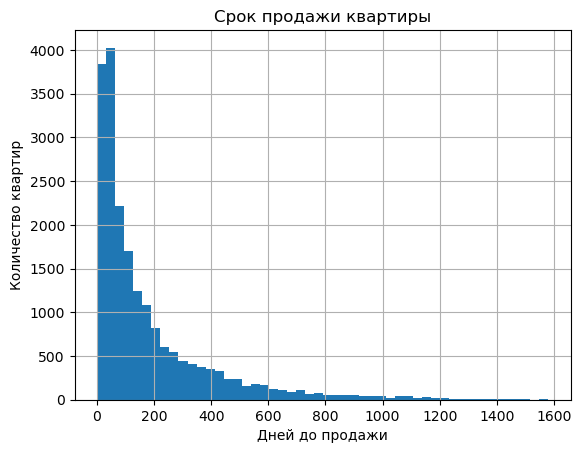

count    20139.000000
mean       180.657431
std        219.739505
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


In [38]:
# построим гистограмму количества дней до продажи
data['days_exposition'].hist(bins=50).set(title='Срок продажи квартиры', 
    xlabel='Дней до продажи', ylabel='Количество квартир');
plt.show()

# изучим числовые характеристики
print(data['days_exposition'].describe())

**Вывод**

- Из анализа можно сделать вывод, что большая часть квартир размещается и продается в срок до 100 дней. Этот период можно назвать нормальным для продажи квартиры.
- Среднее время продажи  составляет около 5,5 месяцев. 
- Медианное значение - около 3 месяцев. 
- Быстрыми продажами можно назвать срок до 45 дней. 
- Долгие - более 200 дней. 

**Факторы, влияющие на общую (полную) стоимость объекта**

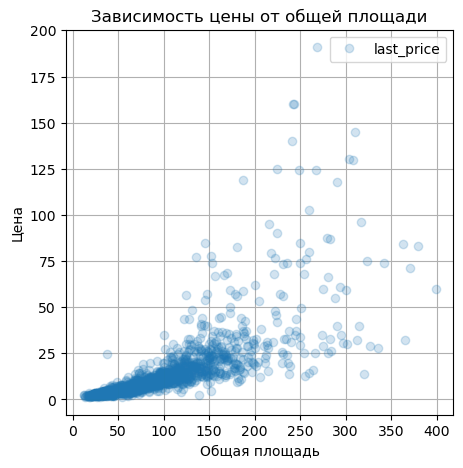

Коэффециент корреляции: 0.7253939745977552


In [39]:
# зависимость цены от общей площади квартиры
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5), alpha=0.2, title='Зависимость цены от общей площади' )
    .set(xlabel='Общая площадь',
         ylabel='Цена')
)
plt.show()
print('Коэффециент корреляции:', data['total_area'].corr(data['last_price']))

**Вывод**
- На графике видна зависисмость итоговой цены квартиры от общей площади продаваемой квартиры. Коэффицент Пирсона (корреляции) равен 0.73, что говорит о довольно высокой корреляции между общей площадью и общей ценой на объект недвижимости. На графике также видно, что при возрастании площади растет и цена.

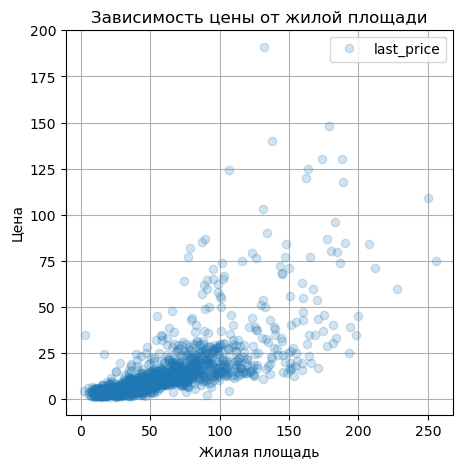

Коэффециент корреляции: 0.6458157360011961


In [40]:
# зависимость цены от жилой площади квартиры
(
    data.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5), alpha=0.2, title='Зависимость цены от жилой площади' )
    .set(xlabel='Жилая площадь',
         ylabel='Цена')
)
plt.show()
print('Коэффециент корреляции:', data['living_area'].corr(data['last_price']))

**Вывод**
- На графике видна зависисмость итоговой цены квартиры от жилой площади продаваемой квартиры. Коэффицент Пирсона (корреляции) равен 0.64, что также говорит о довольно высокой корреляции между общей площадью и общей ценой на объект недвижимости и при возрастании жилой площади растет и цена. Всё выглядит вполне логично в сравнении с предыдущим выводом: при увеличении общей площади обычно растёт и жилая площадь, а т.к. общая площадь существенно влияет на цену, то и жилая площадь также существенно будет влиять на итоговую цену, что и доказаывается сравнимыми коэффициентами Пирсона (0,73 и 0,65 соответственно)

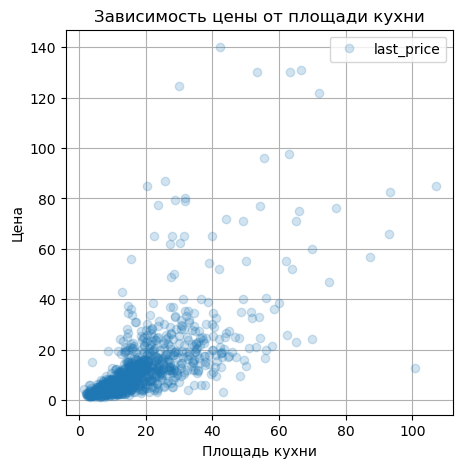

Коэффециент корреляции: 0.5790748419810943


In [41]:
# зависимость цены от площади кухни
(
    data.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5), alpha=0.2, title='Зависимость цены от площади кухни' )
    .set(xlabel='Площадь кухни',
         ylabel='Цена')
)
plt.show()
print('Коэффециент корреляции:', data['kitchen_area'].corr(data['last_price']))

**Вывод**
- На графике видна зависисмость итоговой цены квартиры от площади кухни квартиры. Коэффицент Пирсона (корреляции) равен 0.58. Т.е. при увеличении площади кухни растет и итоговая стоимость квартиры. Логично будет продолжить выводы из предыдущих двух пунктов и сказать, что чаще всего рост площади квартиры зависит от роста общей площади квартиры. А т.к. общая площадь имеет существенное влияние на итоговую цену, то и общая площадь квартиры будет влиять на цену на сопоставимом уровне. Именно поэтому все 3 графика схожи и имеют похожие показатели коэффициента корреляции. 

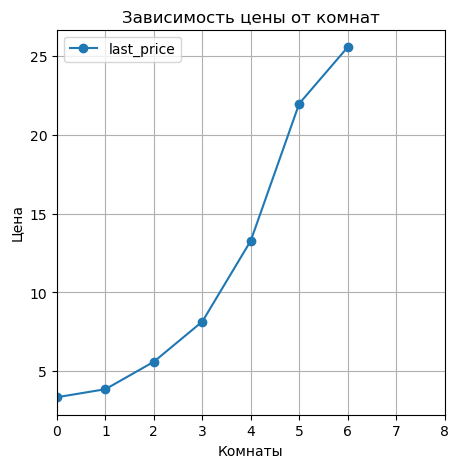

Коэффециент корреляции: 0.4085530973717942


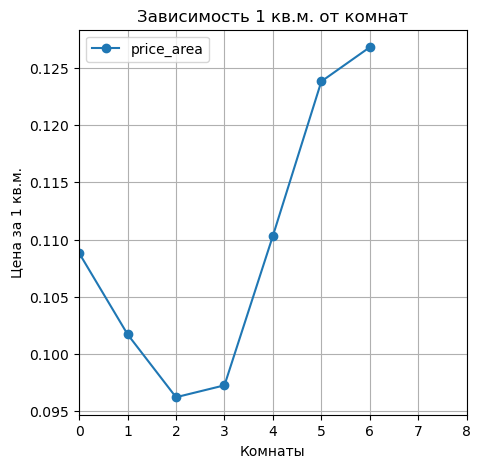

Коэффециент корреляции: 0.02396841172236486


In [42]:
# зависимость цены от количества комнат
(
    data.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5), alpha=1, xlim=(0,8), title='Зависимость цены от комнат' )
    .set(xlabel='Комнаты',
         ylabel='Цена')
)
plt.show()
print('Коэффециент корреляции:', data['rooms'].corr(data['last_price']))

# зависимость цены за 1 кв.м. от количества комнат
(
    data.pivot_table(index='rooms', values='price_area')
    .plot(grid=True, style='o-', figsize=(5, 5), alpha=1, xlim=(0,8), title='Зависимость 1 кв.м. от комнат' )
    .set(xlabel='Комнаты',
         ylabel='Цена за 1 кв.м.')
)
plt.show()
print('Коэффециент корреляции:', data['rooms'].corr(data['price_area']))

**Вывод**
- На графике с зависимостью общей цены от количества комнат коэффициент Пирсона равен 0,41. Это говорит о тенденции роста стоимости квартиры от количества комнат. 
- На втором графике было проанализировано влияние количества комнат на цену за 1 кв.м.. Здесь можно сделать вывод, что цена 1 кв.м. имеет тенденцию снижения от 1 комнатных квартир до 2 комнатных. Однако далее цена растет и существенно возрастает в цене начиная с 4 комнат.

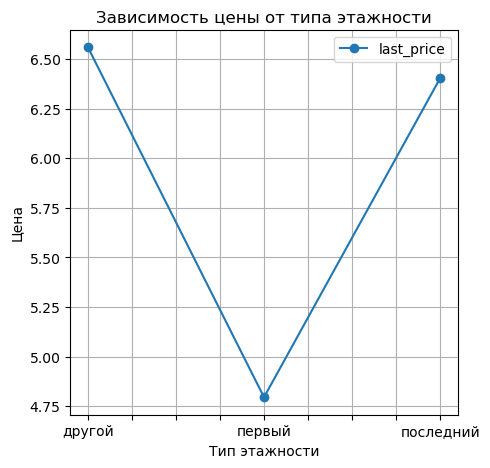

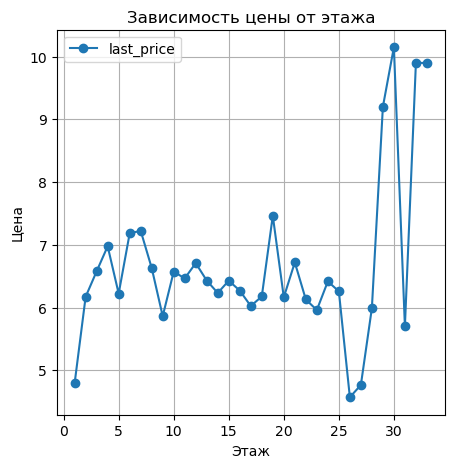

Коэффециент корреляции: 0.02459462666887354


In [43]:
# зависимость цены от типа этажности квартиры
(
    data.pivot_table(index='floor_type', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5), alpha=1, title='Зависимость цены от типа этажности' )
    .set(xlabel='Тип этажности',
         ylabel='Цена')
)
plt.show()



# зависимость цены от этажа квартиры
(
    data.pivot_table(index='floor', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5), alpha=1,  title='Зависимость цены от этажа' )
    .set(xlabel='Этаж',
         ylabel='Цена')
)
plt.show()
print('Коэффециент корреляции:', data['floor'].corr(data['last_price']))

**Вывод**
- На графике зависимости цены от типа этажности видно, что первые этажи имеют цену ниже нежели остальные типы. 
- Для наглядности также был проанализирован график "Цена-Этаж". Здесь можно обратить внимание, что первый этаж - наименее выгодный при продаже квартиры и его цена чаще ниже, чем остальные этажи. Тут же можно увидеть, что цена на 5, 8, 9 этаж снижается. Это может говорить о том, что в объявлениях находятся квартиры стандартной этажности - 5 и 9 этажные дома. 
- Если смотреть на коэффициент корреляции, то здесь вывод однозначен - влияние этажа невелико (0,02).

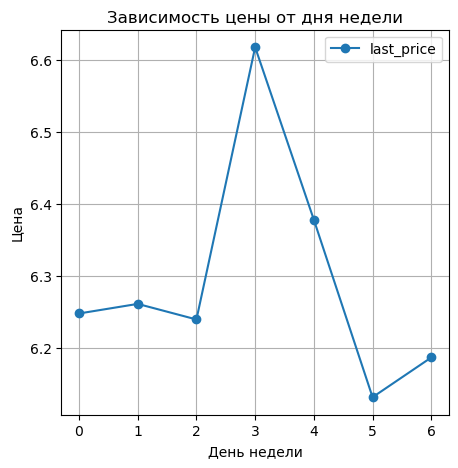

In [44]:
# зависимость цены от даты размещения
(
    data.pivot_table(index='weekday', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5), alpha=1, title='Зависимость цены от дня недели' )
    .set(xlabel='День недели',
         ylabel='Цена')
)
plt.show()
#print('Коэффециент корреляции:', data['weekday'].corr(data['last_price']))

**Вывод**

- На графике влияние дня недели, в который было размещено объявление на итоговую цену квартиры. Коэффициент Пирсона здесь не применим, т.к. линейной зависимости цены от дня недели нет. Тем не менее квартиры, опубликованные в субботу и воскресенье являются самыми выгодными, а в четверг - самыми дорогими. 

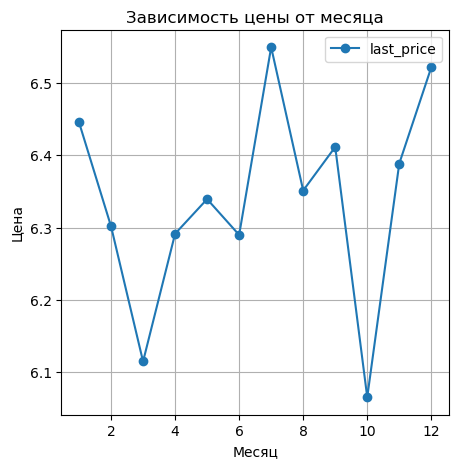

In [45]:
# зависимость цены от месяца
(
    data.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5), alpha=1, title='Зависимость цены от месяца' )
    .set(xlabel='Месяц',
         ylabel='Цена')
)
plt.show()

**Вывод**

- На грифике влияния месяца размещения объявления на общую цену квартиры можно выделить несколько фактов. 
Первый, максимальные цены на квартиры в декабре и июле.
Второй, минимальные цены в октябре и марте.
Третий, цены к концу года растут.
Четвертый, есть четкие периоды снижения (январь-март, июль-октябрь) и повышения (март-июль, октябрь-декабрь) цен. 

- Коэффициент Пирсона здесь не применим, т.к. линейной зависимости цены от месяца нет.

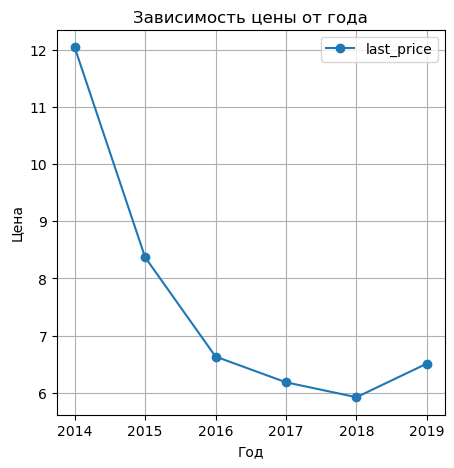

In [46]:
# зависимость цены от года
(
    data.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5), alpha=1, title='Зависимость цены от года' )
    .set(xlabel='Год',
         ylabel='Цена')
)
plt.show()

**Вывод**

- На графике зависимости цены от года стоит обратить внимание на снижение цен в период с 2014 год по 2018. Резкое снижение произошло в период с 2014 по 2016 год. Далее до 2018 года снижение замедлилось. Это может быть влияние экономического кризиса в стране в этот период и последующее "выздоровление" экономики к 2019 году, о чем может говорить начало роста цен. Коэффициент Пирсона здесь не применим, т.к. линейной зависимости цены от года размещения объявления нет.

**Общий вывод влияния факторов на цену квартиры**

- Наибольшее влияние на итоговую цену оказывают общая(коэффициент Пирсона составляет 0,73), жилая(коэффициент Пирсона составляет 0,65) площади квартиры, а также площадь кухни(коэффициент Пирсона составляет 0,58). Это высокие цифры, показывающие, что с ростом площадей существенно растет и общая стоимость квартиры, что в целом логично. 
- Количество комнат имеет влияние на общую стоимость с показателем коэффициента корреляции 0,41. Чаще всего рост количества комнат связан с ростом общей площади квартиры, а т.к. при увеличении площадей растет и цена, то логично, что и при росте количества комнат цена будет расти.
- Этаж, на котором располагается квартира влияет на цену. Здесь коэффициент равен 0,02. Однако стоит отметить, что первые этажи имеют существенно более низкие и выгодные цены. Рост цен на последние этажи может быть связан с квартирами элитного жилья, например, пентхаусов.
- Влияние дня недели, в который было размещено объявление на итоговую цену квартиры, говорит о том, что день недели никак не влияет на общую итоговую цену недвижимости. Тем не менее квартиры, опубликованные в выходные дни являются самыми выгодными, а в четверг - самыми дорогими. 
- Влияние месяца размещения объявления на общую цену квартиры можно выделить несколько фактов. Максимальные цены на квартиры в декабре и июле. Наиболее выгодные цены - в марте и октябре. К концу года цены становятся выше. Существуют периоды снижения (январь-март, июль-октябрь) и повышения (март-июль, октябрь-декабрь) цен на квартиры. Коэффициент корреляции здесь не рассчитывается из-за отсутствия линейной зависимости двух показателей.
- В период с 2014 год по 2018 цены резко стали снижаться. Наиболее резкое снижение произошло в период с 2014 по 2016 год. Далее до 2018 года снижение замедлилось. Это может быть влияние экономического кризиса в стране в этот период и последующее "выздоровление" экономики к 2019 году, о чем может говорить начало роста цен. Цена от года не имеет влияния на итоговую цену, поэтому и коэффициент корреляции здесь также не был рассчитан. 

In [47]:
# выберем топ-10 городов по числу объявлений
top_10 = data['locality_name'].value_counts().head(10)
top_10

Санкт-Петербург    15546
Мурино               586
Кудрово              470
Шушары               439
Всеволожск           397
Пушкин               368
Колпино              337
Парголово            326
Гатчина              306
Выборг               233
Name: locality_name, dtype: int64

<AxesSubplot:title={'center':'Топ 10 городов по цене за 1 кв.м.'}, xlabel='locality_name'>

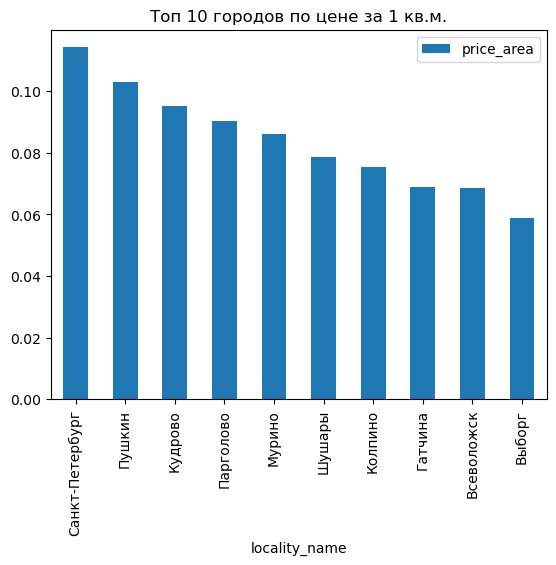

In [48]:
# строим столбцатый график по средней цене в населенном пункте
(
 data
    .query('locality_name in @top_10.index')
    .pivot_table(index='locality_name', values='price_area', aggfunc='mean')
    .sort_values('price_area', ascending=False)
    .plot(kind='bar', title='Топ 10 городов по цене за 1 кв.м.')
)

**Вывод** 

- Населённые пункты с самой высокой стоимостью квадратного метра - это Санкт-Петербург с ценой более 114 тысяч рублей и Пушкин с ценой более 103 тысяч рублей за кв.м.
- Населённые пункты с самой низкой стоимостью квадратного метра - это Всеволожск и Выборг. Во Всеволожске цена за квадратный метр равна около 68,5 тысяч рублей. В Выборге - чуть больше 58 тысяч рублей.

    city_centers_nearest_km  price_area
0                       0.0    0.248024
1                       1.0    0.161517
2                       7.0    0.156231
3                       2.0    0.156183
4                       6.0    0.149465
5                       5.0    0.139904
6                      27.0    0.132116
7                       4.0    0.130248
8                       8.0    0.124268
9                       3.0    0.121563
10                      9.0    0.113351
11                     10.0    0.112786
12                     11.0    0.108382
13                     13.0    0.108099
14                     12.0    0.107491
15                     15.0    0.104290
16                     14.0    0.104201
17                     20.0    0.103045
18                     16.0    0.100543
19                     19.0    0.098658
20                     17.0    0.096975
21                     18.0    0.096362
22                     21.0    0.094470
23                     23.0    0.092002


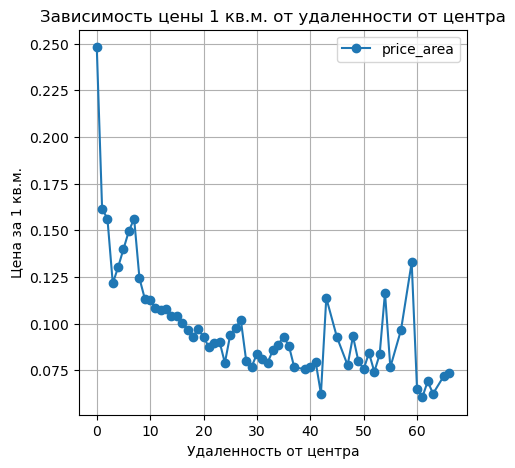

In [49]:
# выборка недвижимости в Санкт-Петербурге
center__price = data.query('locality_name == "Санкт-Петербург"').groupby('city_centers_nearest_km')['price_area'].mean()\
.sort_values(ascending = False).reset_index()
print(center__price)

(
    data.pivot_table(index='city_centers_nearest_km', values='price_area')
    .plot(grid=True, style='o-', figsize=(5, 5), alpha=1, title='Зависимость цены 1 кв.м. от удаленности от центра' )
    .set(xlabel='Удаленность от центра',
         ylabel='Цена за 1 кв.м.')
)
plt.show()

**Вывод**

- Очевидно, что чем ближе центр города, тем цена за 1 кв.м. квартиры, а следовательно и общая цена выше аналогичной квартиры за центром города (смею предположить по графику, что центром города можно считать квартиры до 10 км) 

# **Итоговый вывод**

- Исходный датафрейм был недостаточно готовым к полноценному анализу: было много пропусков, неявные дупликаты, выбросы, неправильные типы данных. 
- На основе анализа часть пропусков была удалена без потери качества, т.к. их количество и доля от всего датафрейма была несущественной. 
- Изменён тип данных на нужный формат, а удалены аномалии, которые могли исказить исследование и итоговые выоды. 
- Для удобства анализа были рассчитаны некоторые значения, они добавлены в новые столбцы, которые в дальнейшем были использованы для анализа. Была посчитана цена за 1 квадратный метр, разделили дату публикации на составляющие и смогли проанализировать данные в разрезе дня, месяца и года, добавили новый категорийный признак для типа этажей и рассчитали влияние расстояния до центра города в километрах на цену квартиры. 
- Также был проведен исследовательский анализ данных. В ходе исследовательского анализа было выявлено, что больше всего на стоимость квартиры влияет общая площадь, там наблюдается очень сильная линейная связь, что подтверждает коэффициент корреляции или Пирсона, также и другие типы площадей можно использовать в качестве сильной линейной связи, однако они лишь часть от общей площади, поэтому значения корреляции сопоставимы. 
- На итоговую стоимость квартиры также влияет и тип этажа. Самыми дешёвыми являются первые этажи, дороже - последние. 
- Наиболее популярными являются квартиры типа "Другой" - это те, которые расположены не на первом и не на последнем этажах.
- Также нужно отметить, что квартиры в 2014 году имели довольно высокие цены, после чего шёл спад ценников вплоть до 2018 года, а дальше, с 2019 года снова ценник пошёл вверх.
- Сами по себе населённые пункты также влияют на общую стоимость квартиры. Так, мы наглядно увидели, что цены в Санкт-Питербурге могут быть существенно выше цен в каких-то относительно небольших жилых поселениях. 
- Сильно цена зависит и от расстояния до центра города, чем ближе к центру - тем дороже цена за квадратный метр и за квартиру в целом. Центром города будем считать расстояние до 10 км. 

**Чек-лист готовности проекта**

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - [x] общая площадь;
        - [x] жилая площадь;
        - [x] площадь кухни;
        - [x] цена объекта;
        - [х] количество комнат;
        - [х] высота потолков;
        - [х] этаж квартиры;
        - [х] тип этажа квартиры («первый», «последний», «другой»);
        - [х] общее количество этажей в доме;
        - [х] расстояние до центра города в метрах;
        - [х] расстояние до ближайшего аэропорта;
        - [х] расстояние до ближайшего парка;
        - [х] день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  изучено, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
- [x]  выявлены факторы больше всего влияющие на полную стоимость объекта. Построены графики, показывающие зависимость цены от указанных ниже параметров. 
- [x]  посчитана средняя цена 1 кв.метра в 10 населённых пунктах с наибольшим числом объявлений. Выделены населённые пункты с самыми высокой и низкой стоимостью кв.метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  вычислена среднюю цену каждого километра до центра города. Описано, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод